In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


Starter vs DNF Counts by Year:
    year  total_starters  total_dnfs  finishers
0  2021            5752        2130       3622
1  2022           10752        3300       7452
2  2023           14552        3738      10814
3  2024            9052        2572       6480
4  2025            7520        1670       5850


<Figure size 800x600 with 0 Axes>

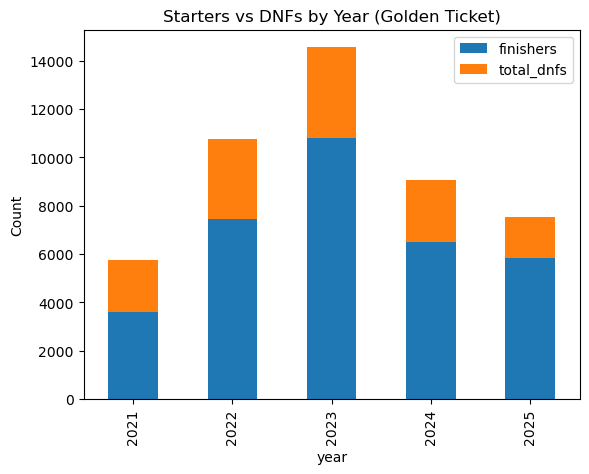

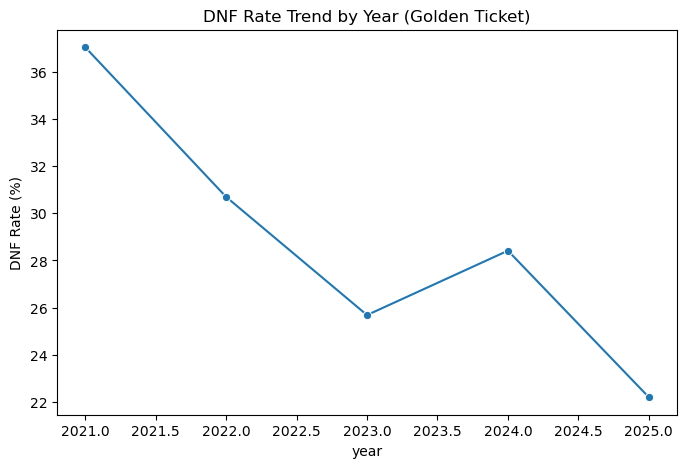


Average DNF Rate by Gender:
   gender  dnf_rate_pct
0      F     28.893846
1      M     27.650769


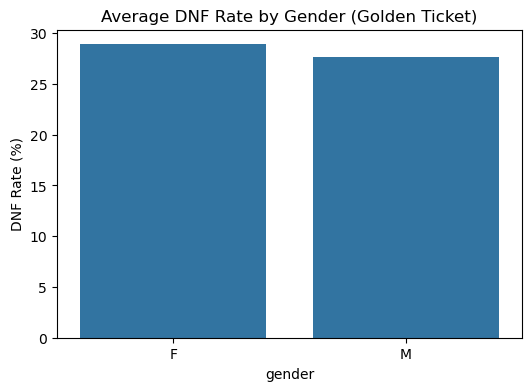


Top 10 Races by DNF Rate:
 race_name
Doi Inthanon        45.0
Javelina            39.0
UTMB                36.0
Grindstone          29.0
CCC                 27.0
Nice Cote d Azur    26.0
The Canyons         23.0
Chianti (UTCC)      22.0
Black Canyon        21.0
Bandera             21.0
Tarawera            11.0
Name: dnf_rate_pct, dtype: float64


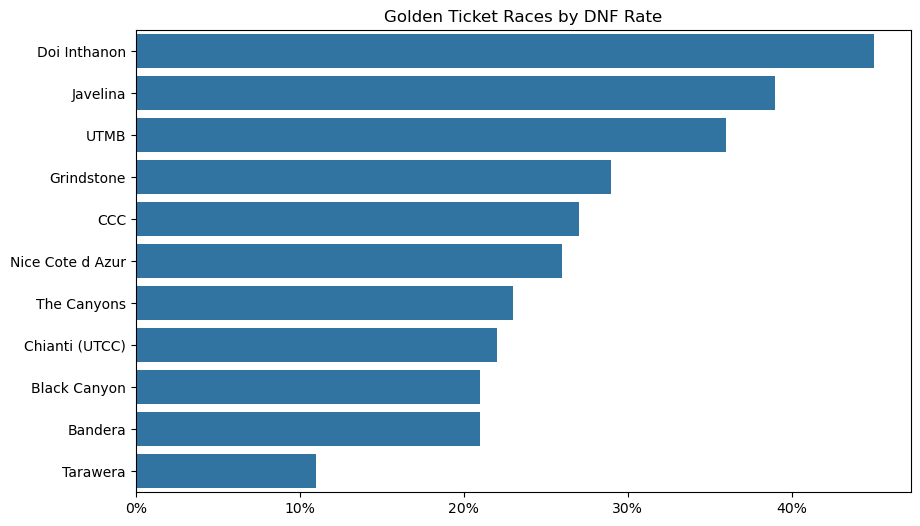


Average DNF Rate by Race Type:
            race_type  dnf_rate_pct
0      Golden Ticket     28.141667
1  Non-Golden Ticket     24.910185


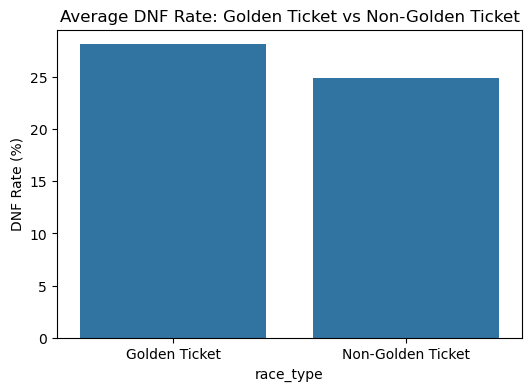

In [3]:
# File path for dnf_starter_metrics
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")


# Filter Golden Ticket races
gt_df = df[df["race_type"] == "Golden Ticket"]

# 1. Starter vs DNF counts by year (Golden Ticket only)
starter_dnf_year = gt_df.groupby("year").agg(
    total_starters=("total_starters", "sum"),
    total_dnfs=("total_dnfs", "sum")
).reset_index()
starter_dnf_year["finishers"] = starter_dnf_year["total_starters"] - starter_dnf_year["total_dnfs"]

print("\nStarter vs DNF Counts by Year:\n", starter_dnf_year)

plt.figure(figsize=(8,6))
starter_dnf_year.plot(x="year", y=["finishers", "total_dnfs"], kind="bar", stacked=True)
plt.title("Starters vs DNFs by Year (Golden Ticket)")
plt.ylabel("Count")
plt.show()

# 2. DNF rate trend by year
starter_dnf_year["dnf_rate_pct"] = (starter_dnf_year["total_dnfs"] / starter_dnf_year["total_starters"]) * 100

plt.figure(figsize=(8,5))
sns.lineplot(data=starter_dnf_year, x="year", y="dnf_rate_pct", marker="o")
plt.title("DNF Rate Trend by Year (Golden Ticket)")
plt.ylabel("DNF Rate (%)")
plt.show()

# 3. DNF rate by gender for Golden Ticket races
gender_dnf = gt_df.groupby("gender")["dnf_rate_pct"].mean().reset_index()
gender_dnf = gender_dnf[gender_dnf["gender"].isin(["F","M"])]  # exclude Overall

print("\nAverage DNF Rate by Gender:\n", gender_dnf)

plt.figure(figsize=(6,4))
sns.barplot(data=gender_dnf, x="gender", y="dnf_rate_pct")
plt.title("Average DNF Rate by Gender (Golden Ticket)")
plt.ylabel("DNF Rate (%)")
plt.show()

# 4. DNF rate by race (All: There are only 11)
def to_percent(x, _):
    return f"{x * 1:.0f}%"

race_dnf = round(gt_df.groupby("race_name")["dnf_rate_pct"].mean().sort_values(ascending=False).head(11), 0)

print("\nTop 10 Races by DNF Rate:\n", race_dnf)

plt.figure(figsize=(10,6))
sns.barplot(x=race_dnf.values, y=race_dnf.index)
plt.title("Golden Ticket Races by DNF Rate")
plt.xlabel("")
plt.ylabel("")
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

# 5. Compare average DNF rate for Golden Ticket vs Non-Golden Ticket races
avg_dnf_by_type = df.groupby("race_type")["dnf_rate_pct"].mean().reset_index()

print("\nAverage DNF Rate by Race Type:\n", avg_dnf_by_type)

plt.figure(figsize=(6,4))
sns.barplot(data=avg_dnf_by_type, x="race_type", y="dnf_rate_pct")
plt.title("Average DNF Rate: Golden Ticket vs Non-Golden Ticket")
plt.ylabel("DNF Rate (%)")
plt.show()


# Golden Ticket Race Totals (Starters / DNFs / Finishers)

In [60]:
# File path for dnf_starter_metrics
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")

# Filter main df for GT races
gt_df = df[df["race_type"] == "Golden Ticket"]

#Filter for gender = Overall
gt_df_filtered = gt_df[gt_df["gender"] == "Overall"]

# Filter for Non-Golden Ticket races and Overall gender
gt_df_filtered = gt_df[
    (gt_df["race_type"] == "Golden Ticket") &
    (gt_df["gender"] == "Overall")
]

# Group and aggregate
gt_starter_dnf_race = gt_df_filtered.groupby(["year", "race_name"]).agg(
    total_starters=("total_starters", "sum"),
    total_dnfs=("total_dnfs", "sum")
).reset_index()

# Calculate finishers
gt_starter_dnf_race["finishers"] = (
    gt_starter_dnf_race["total_starters"] - gt_starter_dnf_race["total_dnfs"]
)

gt_starter_dnf_race = gt_starter_dnf_race.sort_values(by = ['race_name', 'year']).reset_index(drop = True)

print("Golden Ticket Race Totals (Starters/ DNFs / Finishers")
gt_starter_dnf_race

Golden Ticket Race Totals (Starters/ DNFs / Finishers


,year,race_name,total_starters,total_dnfs,finishers
0,2022,Bandera,389,78,311
1,2023,Bandera,400,80,320
2,2022,Black Canyon,699,183,516
3,2023,Black Canyon,846,141,705
4,2024,Black Canyon,929,189,740
5,2025,Black Canyon,1002,226,776
6,2023,CCC,2227,577,1650
7,2024,CCC,2269,633,1636
8,2025,Chianti (UTCC),590,119,471
9,2022,Doi Inthanon,514,227,287


# Non-Golden Ticket Race Totals (Starters / DNFs / Finishers)

In [59]:
# File path for dnf_starter_metrics
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")

# Filter main df for non-GT races
non_gt_df = df[df["race_type"] == "Non-Golden Ticket"]

#Filter for gender = Overall
non_gt_df_filtered = non_gt_df[non_gt_df["gender"] == "Overall"]

# Filter for Non-Golden Ticket races and Overall gender
non_gt_df_filtered = non_gt_df[
    (non_gt_df["race_type"] == "Non-Golden Ticket") &
    (non_gt_df["gender"] == "Overall")
]

# Group and aggregate
non_gt_starter_dnf_race = non_gt_df_filtered.groupby(["year", "race_name"]).agg(
    total_starters=("total_starters", "sum"),
    total_dnfs=("total_dnfs", "sum")
).reset_index()

# Calculate finishers
non_gt_starter_dnf_race["finishers"] = (
    non_gt_starter_dnf_race["total_starters"] - non_gt_starter_dnf_race["total_dnfs"]
)

non_gt_starter_dnf_race = non_gt_starter_dnf_race.sort_values(by = ['race_name', 'year']).reset_index(drop = True)

print("Non-Golden Ticket Race Totals (Starters/ DNFs / Finishers")
non_gt_starter_dnf_race

Non-Golden Ticket Race Totals (Starters/ DNFs / Finishers


,year,race_name,total_starters,total_dnfs,finishers
0,2024,Bandera,389,65,324
1,2025,Bandera,353,121,232
2,2021,Black Canyon,445,81,364
3,2021,CCC,2010,432,1578
4,2022,CCC,2112,385,1727
5,2025,CCC,2126,485,1641
6,2024,Chianti (UTCC),413,30,383
7,2024,Doi Inthanon,359,126,233
8,2024,Grindstone,306,94,212
9,2025,Grindstone,263,106,157


In [70]:
# Filter for Overall gender only
df = df[df["gender"] == "Overall"]

# Create Golden Ticket flag
df["golden_ticket"] = df["race_type"] == "Golden Ticket"

# Sort by race and year
df_sorted = df.sort_values(by=["race_name", "year"])

# Detect first year where GT status changes from True to False
df_sorted["gt_change"] = (
    df_sorted.groupby("race_name")["golden_ticket"]
    .transform(lambda x: x.shift(1) & ~x)
)

# Extract only the first year after GT status is lost per race
first_non_gt = df_sorted[df_sorted["gt_change"]].copy()

# Final output
result = first_non_gt[["race_name", "year", "total_starters", "total_dnfs", "dnf_rate_pct"]]
result = result.sort_values(by = ['race_name', 'year']).reset_index(drop = True)
result

,race_name,year,total_starters,total_dnfs,dnf_rate_pct
0,Bandera,2024,389,65,16.71
1,CCC,2025,2126,485,22.81
2,Doi Inthanon,2024,359,126,35.10
3,Grindstone,2024,306,94,30.72
4,Nice Cote d Azur,2024,1110,213,19.19
5,Tarawera,2024,726,81,11.16
6,UTMB,2023,2688,931,34.64


# DataFrame and barplot looking at the pct_change_starters for the first year after a race loses Golden Ticket status

In [62]:
# Load data
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")

df = df[df["gender"] == "Overall"]

# Identify first Non-Golden Ticket year after Golden Ticket for each race
lost_gt_rows = []
for race in df['race_name'].unique():
    race_df = df[df['race_name'] == race].sort_values('year')
    for i in range(len(race_df)-1):
        if race_df.iloc[i]['race_type'] == 'Golden Ticket' and race_df.iloc[i+1]['race_type'] == 'Non-Golden Ticket':
            lost_gt_rows.append((race_df.iloc[i], race_df.iloc[i+1]))

# Calculate percent changes comparing Non-GT year to previous GT year
results = []
for before, after in lost_gt_rows:
    race = after['race_name']
    region = after['race_region']
    lost_year = after['year']
    starters_before = before['total_starters']
    starters_after = after['total_starters']
    dnf_before = before['dnf_rate_pct']
    dnf_after = after['dnf_rate_pct']

    pct_change_starters = round(((starters_after - starters_before) / starters_before) * 100, 1)
    pct_change_dnf_rate = round(((dnf_after - dnf_before) / dnf_before) * 100, 1)

    results.append({
        'race_name': race,
        'race_region': region,
        'lost_year': lost_year,
        'starters_before': starters_before,
        'starters_after': starters_after,
        'dnf_before': dnf_before,
        'dnf_after': dnf_after,
        'percent_change_starters': pct_change_starters,
        'percent_change_dnf_rate': pct_change_dnf_rate
    })

percent_change_df = pd.DataFrame(results)
percent_change_df

,race_name,race_region,lost_year,starters_before,starters_after,dnf_before,dnf_after,percent_change_starters,percent_change_dnf_rate
0,Bandera,US,2024,400,389,20.00,16.71,-2.8,-16.4
1,CCC,Non-US,2025,2269,2126,27.90,22.81,-6.3,-18.2
2,Doi Inthanon,Non-US,2024,401,359,48.13,35.10,-10.5,-27.1
3,Grindstone,US,2024,333,306,29.73,30.72,-8.1,3.3
4,Nice Cote d Azur,Non-US,2024,975,1110,27.38,19.19,13.8,-29.9
5,Tarawera,Non-US,2024,776,726,12.37,11.16,-6.4,-9.8
6,UTMB,Non-US,2023,2627,2688,31.90,34.64,2.3,8.6


C:\Users\user\AppData\Local\Temp\ipykernel_31964\1530796171.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



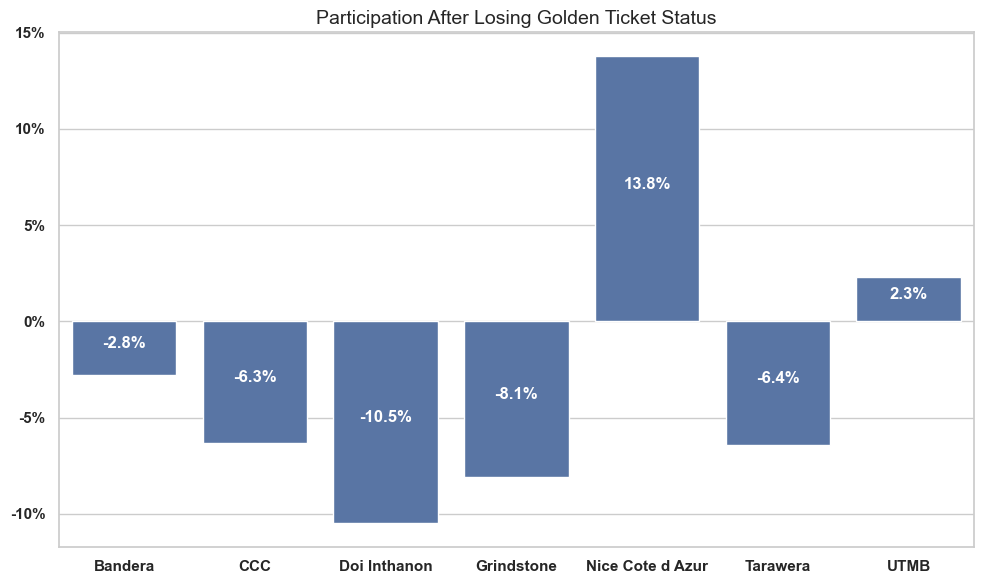

In [66]:

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='race_name', y='percent_change_starters', data=percent_change_df)
plt.title('Participation After Losing Golden Ticket Status', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontweight = 'bold')

# yticks converted to %
plt.gca().set_yticklabels([f"{int(t)}%" for t in plt.gca().get_yticks()])
plt.yticks(fontweight = 'bold')

# Add percentage labels on top of bars
for index, row in percent_change_df.iterrows():
    # Determine text color based on bar value
    text_color = 'white' if row['percent_change_starters'] > 0 else 'white'
    barplot.text(index, row['percent_change_starters']/2,  # Position text halfway inside the bar
                 f"{row['percent_change_starters']}%", color=text_color, ha="center", fontsize=12, fontweight = 'bold')


plt.tight_layout()

plt.savefig('../data/participation_after_losing_gt_status_plot.png', dpi = 300)

plt.show()